In [1]:
from utils.binaries import *
from utils.plotting import *

from matplotlib.patches import RegularPolygon

def hexit_60(n_max):
    pairs = []
    if n_max >= 0:
        pairs.append(np.zeros(2, dtype=int)[:, None])
    if n_max >= 1:
        seq = [1, 0, -1]
        p0  = np.hstack((seq, seq[::-1]))
        N   = len(p0)
        p1  = np.hstack((p0[N-2:], p0[:N-2]))
        pairs.append(np.stack((p0, p1), axis=0))
    for n in range(2, n_max+1):
        seq = np.arange(n, -n-1, -1, dtype=int)
        p0  = np.hstack((seq, (n-1)*[-n], seq[::-1], (n-1)*[n]))
        N   = len(p0)
        p1  = np.hstack((p0[N-2*n:], p0[:N-2*n]))
        pairs.append(np.stack((p0, p1), axis=0))
    if len(pairs) > 0:
        pairs = np.hstack(pairs)
    else:
        pairs = None
    return pairs

def get_points(a, n_max):
    vecs = a * np.array([[1.0, 0.0], [0.5, 0.5*np.sqrt(3)]])
    pairs = hexit_60(n_max = n_max)
    if isinstance(pairs, np.ndarray):
        points = (pairs[:, None]*vecs[..., None]).sum(axis=0)
    else:
        points = None
    return points

00:24:54 (   +2.8s) [INFO   ] -- import logging
00:24:54 (  +117ms) [INFO   ] -- import numpy as np
00:24:54 (    +5ms) [INFO   ] -- import uncertainties
00:24:54 (  +299ms) [INFO   ] -- import pandas as pd
00:24:54 (    +1ms) [WARNING] -- pandas support to be dropped at some point!
00:24:54 (    +1ms) [INFO   ] -- import binaries.tools as tools
00:24:55 (  +328ms) [INFO   ] -- import matplotlib.pyplot as plt
00:24:55 (  +551ms) [INFO   ] -- import seaborn as so
00:24:55 (    +2ms) [INFO   ] -- set MONI_PATH = PosixPath('/home/filip/Data/monit_and_sd')
00:24:55 (    +0ms) [INFO   ] -- set HIST_PATH = PosixPath('/home/filip/Data/monit_and_sd')
00:24:55 (    +1ms) [INFO   ] -- set PLOT_PATH = PosixPath('/home/filip/Data/plots')
00:24:55 (    +0ms) [INFO   ] -- set DATA_PATH = PosixPath('/home/filip/Data')
00:24:55 (    +0ms) [INFO   ] -- set SCAN_PATH = PosixPath('/home/filip/Public/xy-calibration')
00:24:55 (    +0ms) [INFO   ] -- set OFLN_PATH = PosixPath('/home/filip/Public/offline/in

In [2]:
from matplotlib.colors import BoundaryNorm
from matplotlib.cm import ScalarMappable

set_plt_style("double tex")


def setup_plot(*highlights):
    ax = plt.gca()
    ax.set_aspect("equal")
    ax.axis("off")

    points = get_points(1500, 4)
    cmap = plt.cm.viridis
    gradient = plot.gradient(plt.cm.viridis, 5)[::-1]
    bounds = range(6)
    norm = BoundaryNorm(bounds, cmap.N)

    for crown in range(4, -1, -1):
        hex = RegularPolygon((0, 0), numVertices=6, radius=1500 * crown + 750, facecolor=gradient[crown], edgecolor='none', orientation=30 * np.pi/180)
        ax.add_patch(hex)

    ax.scatter(*points, facecolor='w', edgecolor='k', lw=0.3)

    for h in highlights:
        x, y = points[0, h], points[1, h]
        ax.scatter(x, y, facecolor='r', marker='H', s=20, edgecolor='k', lw=0.3)

    for crown in range(1, 5):
        ax.text(
            1500 * crown - 300,
            -700,
            f"$C_{crown}$",
            horizontalalignment="center",
            verticalalignment="center",
            fontsize=7,
            color="w"
        )

    return ax, points


00:24:56 (  +999ms) [DEBUG  ] -- font size set to 9.5
00:24:56 (    +2ms) [DEBUG  ] -- label size set to 13.0
00:24:56 (    +0ms) [DEBUG  ] -- figure size set to [3.3, 2.5]
00:24:56 (    +1ms) [DEBUG  ] -- markersize set to 2.0
00:24:56 (    +0ms) [DEBUG  ] -- usetex set to True
00:24:56 (    +2ms) [DEBUG  ] -- label size set to 13.0
00:24:56 (    +0ms) [DEBUG  ] -- figure size set to [3.3, 2.5]
00:24:56 (    +1ms) [DEBUG  ] -- markersize set to 2.0
00:24:56 (    +0ms) [DEBUG  ] -- usetex set to True


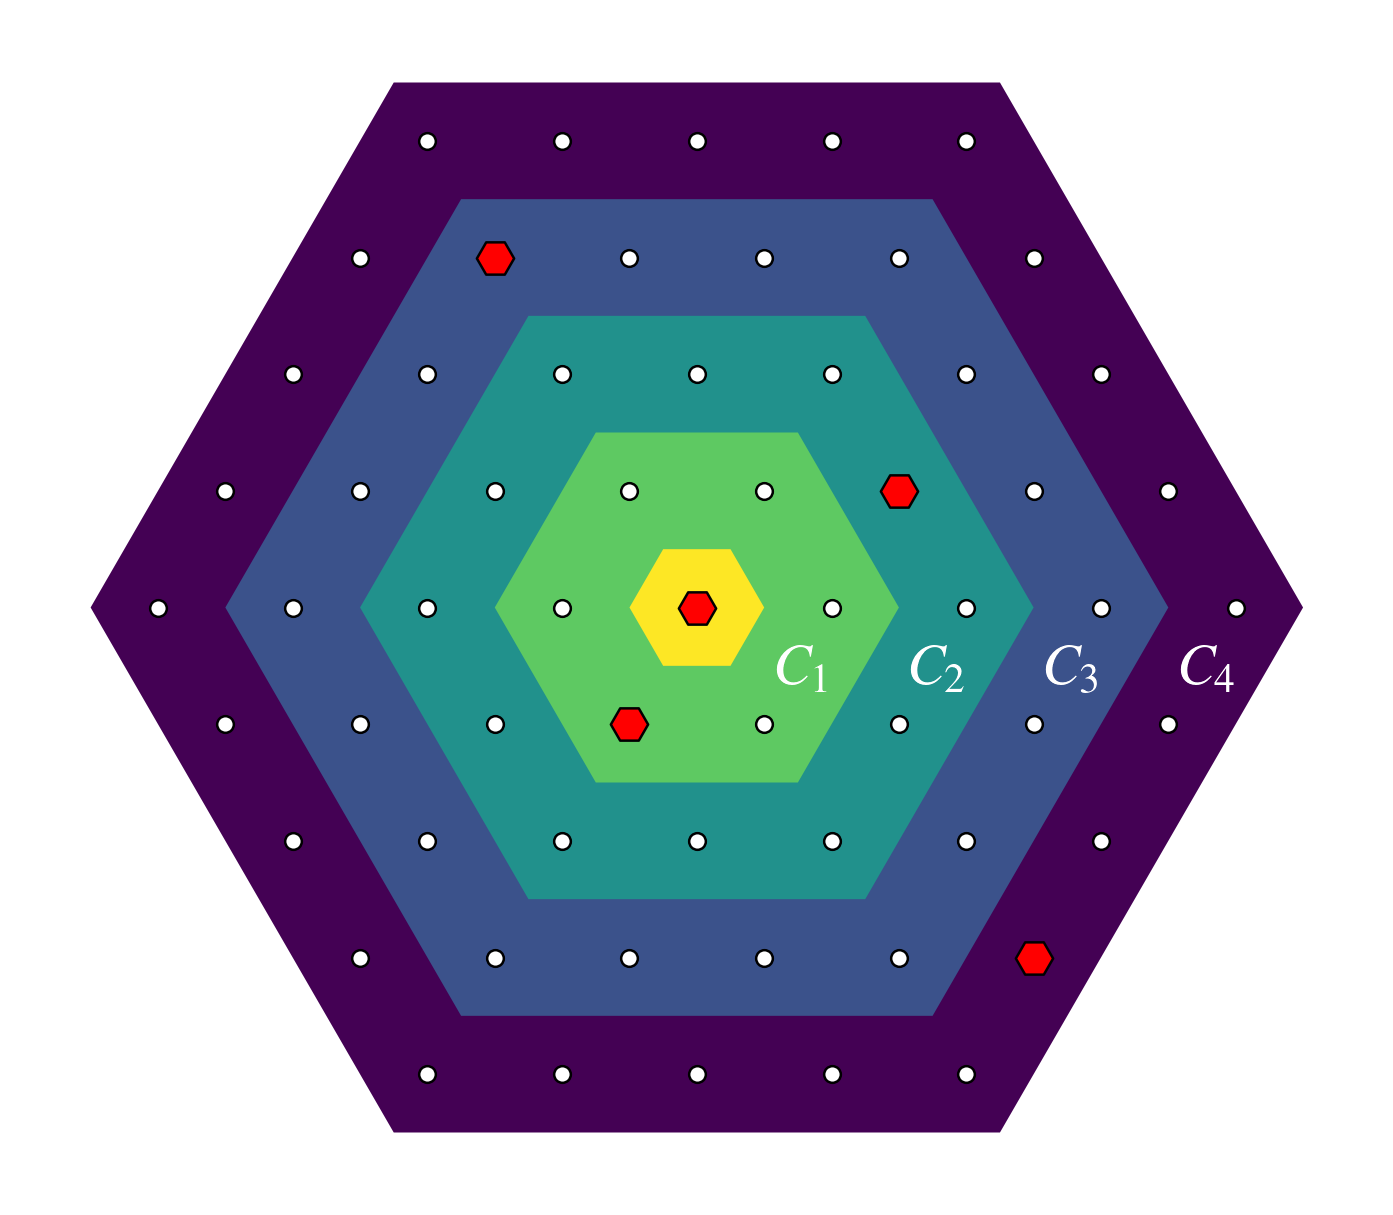

In [10]:
ax, points = setup_plot(0, 5, 8, 25, 58)    # horizontal mode

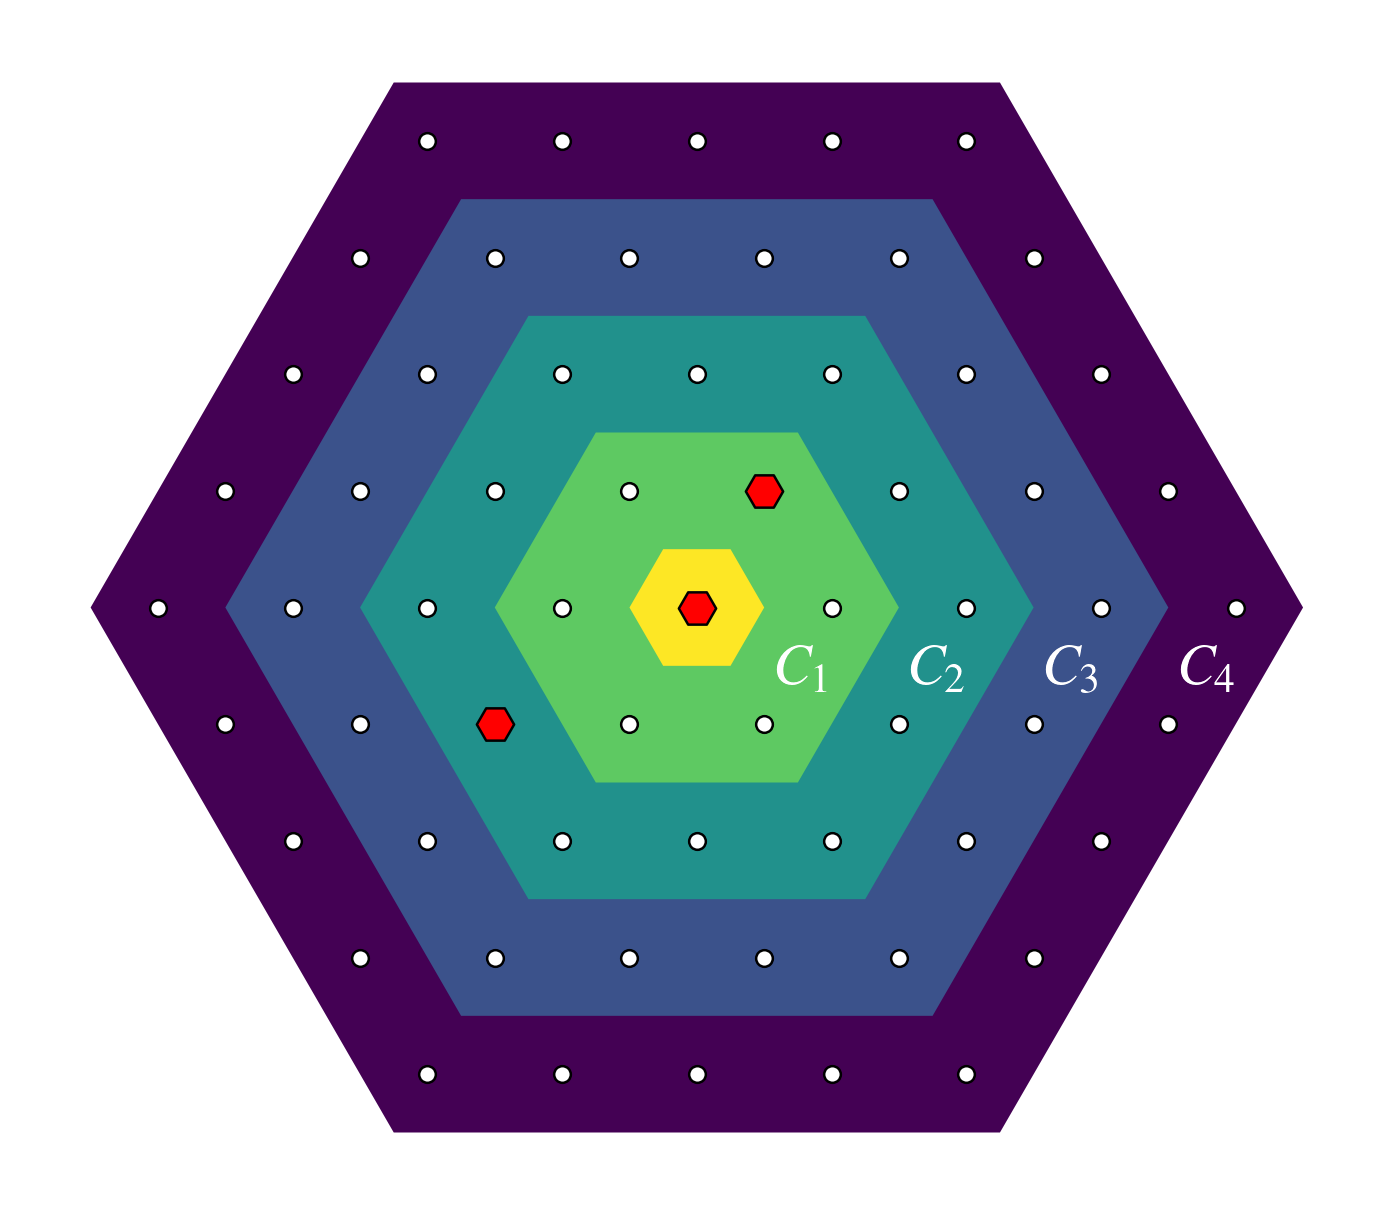

In [5]:
ax, points = setup_plot(0, 2, 14)    # vertical mode